In [2]:
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
import re
import string
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, ArrayDictionary, StopWordRemover


import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
# Load in the dataframe
df = pd.read_csv("dataset_tweet_sentiment_opini_film.csv")
df.head()

,Id,Sentiment,Text Tweet
0,1,negative,Jelek filmnya... apalagi si ernest gak mutu bg...
1,2,negative,Film king Arthur ini film paling jelek dari se...
2,3,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...
3,4,negative,Ane ga suka fast and furious..menurutku kok je...
4,5,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang..."


In [4]:
df['Text Tweet'][4]

'@baekhyun36 kan gua ga tau film nya, lu bilang perang perangan/? Perang"an disebut ama rp yaoi jadi ambigu :v'

In [5]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt 
df['remove_user'] = np.vectorize(remove_pattern)(df['Text Tweet'], "@[\w]*")
df.head()

,Id,Sentiment,Text Tweet,remove_user
0,1,negative,Jelek filmnya... apalagi si ernest gak mutu bg...,Jelek filmnya... apalagi si ernest gak mutu bg...
1,2,negative,Film king Arthur ini film paling jelek dari se...,Film king Arthur ini film paling jelek dari se...
2,3,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...,Sepanjang film gwa berkata kasar terus pada b...
3,4,negative,Ane ga suka fast and furious..menurutku kok je...,Ane ga suka fast and furious..menurutku kok je...
4,5,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang...","kan gua ga tau film nya, lu bilang perang per..."


In [6]:
def remove(tweet):
    #remove angka 
    tweet = re.sub('[0-9]+', '', tweet)
    #remove stock market ticker like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    #remove old style tweet "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    #remove hastage
    tweet = re.sub(r'#([^\s]+)', '', tweet)
    tweet = re.sub(r'!', '', tweet)
    tweet = re.sub(r"(\!)\1+", '', tweet)
    #tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r':\)|;\)|:-\)|\(-:|:-D|=D|:p|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', '', tweet)
    tweet = re.sub(r"(\?)\1+", '', tweet)
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
    tweet = re.sub(r'#([^\s]+)', '', tweet)
    tweet = re.sub(r"(\.)\1+", '', tweet)
    return tweet
df['Tweet_clean'] = df['remove_user'].apply(lambda x: remove(x))
df.head()

,Id,Sentiment,Text Tweet,remove_user,Tweet_clean
0,1,negative,Jelek filmnya... apalagi si ernest gak mutu bg...,Jelek filmnya... apalagi si ernest gak mutu bg...,Jelek filmnya apalagi si ernest gak mutu bgt a...
1,2,negative,Film king Arthur ini film paling jelek dari se...,Film king Arthur ini film paling jelek dari se...,Film king Arthur ini film paling jelek dari se...
2,3,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...,Sepanjang film gwa berkata kasar terus pada b...,Sepanjang film gwa berkata kasar terus pada b...
3,4,negative,Ane ga suka fast and furious..menurutku kok je...,Ane ga suka fast and furious..menurutku kok je...,Ane ga suka fast and furiousmenurutku kok jele...
4,5,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang...","kan gua ga tau film nya, lu bilang perang per...","kan gua ga tau film nya, lu bilang perang per..."


In [8]:
df['Tweet_clean'][4]

' kan gua ga tau film nya, lu bilang perang perangan/? Perang"an disebut ama rp yaoi jadi ambigu v'

In [13]:
df_new = pd.concat([df['Id'],df['Sentiment'],df['Tweet_clean']], axis=1)
df_new.head()

,Id,Sentiment,Tweet_clean
0,1,negative,Jelek filmnya apalagi si ernest gak mutu bgt a...
1,2,negative,Film king Arthur ini film paling jelek dari se...
2,3,negative,Sepanjang film gwa berkata kasar terus pada b...
3,4,negative,Ane ga suka fast and furiousmenurutku kok jele...
4,5,negative,"kan gua ga tau film nya, lu bilang perang per..."


In [16]:
df_new['Tweet_clean'] = df_new['Tweet_clean'].str.lower()
df_new

,Id,Sentiment,Tweet_clean
0,1,negative,jelek filmnya apalagi si ernest gak mutu bgt a...
1,2,negative,film king arthur ini film paling jelek dari se...
2,3,negative,sepanjang film gwa berkata kasar terus pada b...
3,4,negative,ane ga suka fast and furiousmenurutku kok jele...
4,5,negative,"kan gua ga tau film nya, lu bilang perang per..."
...,...,...,...
195,196,positive,fargo juga adaptasi dari film yang cukup berha...
196,197,positive,. waw ini sangat keren flm horor dng jumlah pe...
197,198,positive,film yang tenang dan menghanyutkan. salut den...
198,199,positive,film yg amat menarik. kisah cinta & kesetiaan ...


In [44]:
text = " ".join(review for review in df_new.Tweet_clean)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 18161 words in the combination of all review.


In [55]:
stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopword = ['yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo','kalo', 'amp', 'biar', 'bikin', 'bilang','gak', 'ga', 'krn', 'nya', 'nih', 'sih','bgt','sy','gwa','ane','ama','pdhl',
                    'si', 'tau', 'tdk', 'tuh', 'utk', 'ya','jd', 'jgn', 'sdh', 'aja', 'n', 't','nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt','&amp', 'yah','nntn']
 
# Tambahkan Stopword Baru
data = stop_factory + more_stopword
 
dictionary = ArrayDictionary(data)
str = StopWordRemover(dictionary)
stop = str.remove(text)

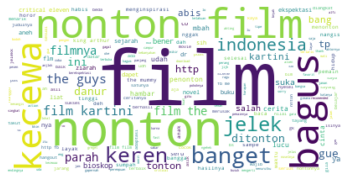

In [56]:
wordcloud = WordCloud(stopwords=stop, background_color="white").generate(stop)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [71]:
wine_mask = np.array(Image.open("tw_4.png"))

wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [72]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [73]:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))
    
transformed_wine_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

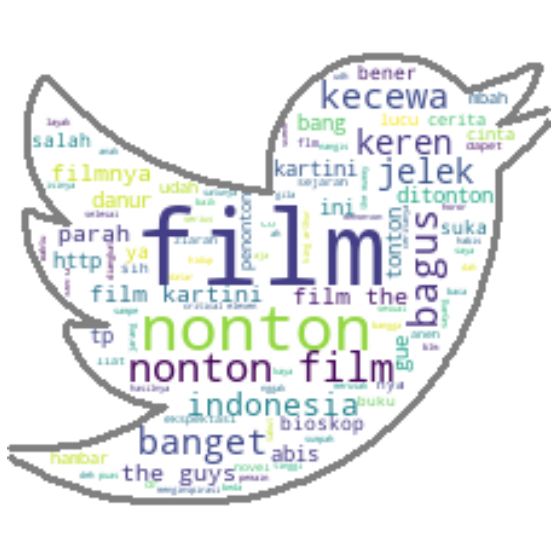

In [76]:
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               stopwords=stop, contour_width=3, contour_color='grey')

# Generate a wordcloud
wc.generate(stop)

# store to file
wc.to_file("tw_3.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()